In [2]:
import matplotlib.pyplot as plt
import uproot
import mplhep
import numpy as np

In [3]:
plt.style.use([mplhep.style.ROOT])

In [14]:
def plotHists(bins, hists, names, colors, ratio_range=[0.9, 1.1], width=1):
    fig = plt.figure(figsize=(8*width,8))
    ax1 = fig.add_subplot(4, 1, (1, 3)) 
    ax2 = fig.add_subplot(4, 1, 4) 
    for hist, name, color in zip(hists, names, colors):
        print("Integral for hist", name, "is", np.sum(hist))
        args = {"label" : name, "color" : color}
        ax1.hist(bins[:-1], bins=bins, weights=hist, histtype='step', **args)
        ratio = np.divide(hist, hists[0], out=np.zeros_like(hist), where=hists[0]!=0)
        ax2.hist(bins[:-1], bins=bins, weights=ratio, histtype='step', label=name, color=color)
    ax2.set_ylim(ratio_range)
    ax1.set_xticklabels([])
    ax1.legend()
    return fig

In [ ]:
def variationHists(file, )

In [59]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root")

In [87]:
branch = "ptl"
#process = "wmunu_minnlo"
var = "resumscale_"+process
#var = "QCDscale_"+process
chan="mn"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])

In [89]:
hist,bins = f[process][histcen].numpy()
bins

array([25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       51., 52., 53., 54., 55.])

In [90]:
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()

Integral for hist Central is 99136178.23670897
Integral for hist up variation is 101383887.9565882
Integral for hist down variation is 95764861.65698843


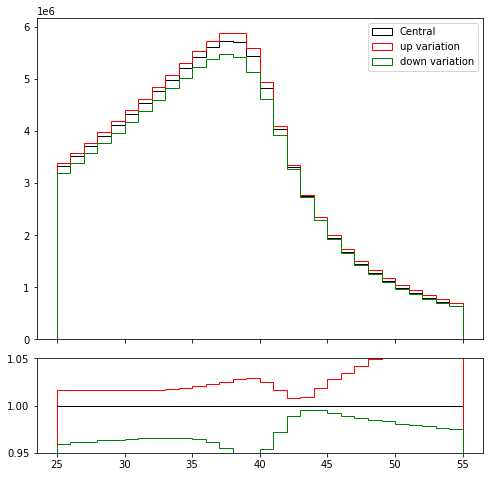

In [17]:
fig = plotHists([bins,binsUp,binsDown], [hist,histUp,histDown], ["Central","up variation", "down variation"], ['black', 'red', 'green'])

Integral for hist Central is 363848246.40046334
Integral for hist up variation is 370497359.9740865
Integral for hist down variation is 358797122.37899065
Integral for hist $m_{W}$ +20 MeV is 363847528.46124864
Integral for hist $m_{W}$ -20 MeV is 363849279.0782268


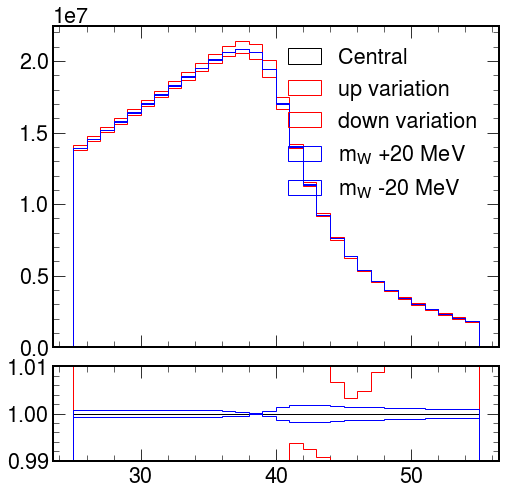

In [15]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_scetlibOnly/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "resumscale_"+process
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
massUp,binsUp = f[process]["_".join([branch,massvar+"Up",chan])].numpy()
massDown,binsDown = f[process]["_".join([branch,massvar+"Down",chan])].numpy()
fig = plotHists([bins,binsUp,binsDown,binsUp,binsDown], [hist,histUp,histDown,massUp,massDown], ["Central","up variation", "down variation", "$m_{W}$ +20 MeV", "$m_{W}$ -20 MeV"], ['black', 'red', 'red', "blue", "blue"])

Integral for hist Central is 368644796.1901399
Integral for hist up variation is 375428371.0541729
Integral for hist down variation is 363471897.3901563
Integral for hist mass+100 MeV is 368631391.1496568
Integral for hist mass -100 MeV is 368655786.18590415


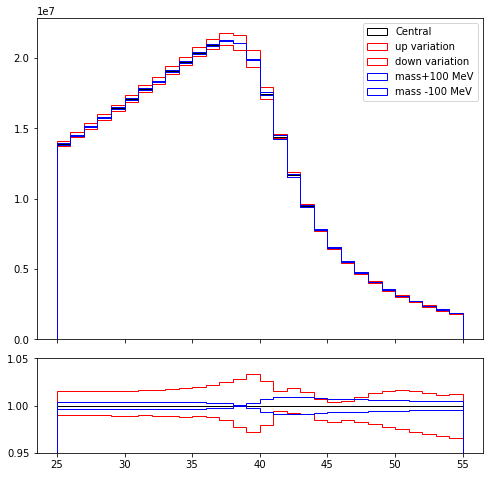

In [86]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_prefsr_scetlibOnly/WGenCombineInput.root")
branch = "ptl_prefsr"
process = "wmunu_minnlo_N3LLCorr"
var = "resumscale_"+process
#var = "resumscale"
#var = "QCDscale_"+process
#var = "massShift100MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
histpre,bins = f[process][histcen].numpy()
histpreUp,binsUp = f[process][histvar].numpy()
histpreDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
masspreUp,binsUp = f[process][branch+"_massShift100MeVUp_m"].numpy()
masspreDown,binsDown = f[process][branch+"_massShift100MeVDown_m"].numpy()
fig = plotHists([bins,binsUp,binsDown,binsUp,binsDown], [histpre,histpreUp,histpreDown,masspreUp,masspreDown], ["Central","up variation", "down variation", "mass+100 MeV", "mass -100 MeV"], ['black', 'red', 'red', "blue", "blue"])



Integral for hist dressed is 368644796.1901399
Integral for hist prefsr is 363848246.40046334
Integral for hist masspre Up is 368631391.1496568
Integral for hist mass Up is 363843104.6828163
Integral for hist mass pre down is 368655786.18590415
Integral for hist mass down is 363851021.0286899


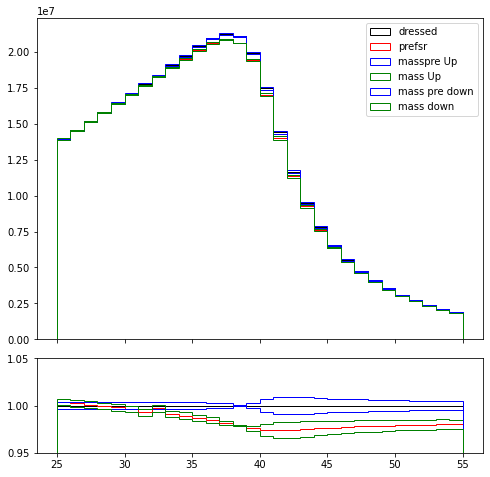

In [88]:
fig = plotHists([bins,bins, bins, bins, bins, bins], [histpre,hist,masspreUp,massUp,masspreDown,massDown], ["dressed","prefsr","masspre Up", "mass Up", "mass pre down", "mass down"], ['black', 'red', "blue", "green", "blue", "green"])

Integral for hist masspre Up is 368631391.1496568
Integral for hist mass Up is 363843104.6828163


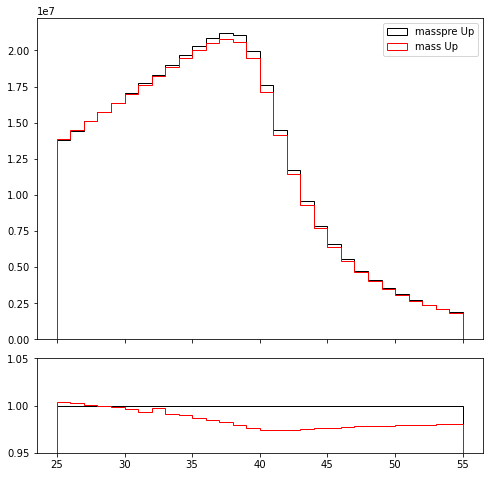

In [87]:
fig = plotHists([bins, bins], [masspreUp,massUp], ["masspre Up", "mass Up",], ['black', 'red',])

In [14]:
fscale = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_scetlib_massScan/fitresults_QCDscale_scanMass_123456789.root")
xvals_scale = fscale["fitresults"]["massShift100MeV"].array()
yvals_scale = fscale["fitresults"]["nllval"].array()

In [15]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_scetlib_massScan/fitresults_123456789.root")
xvals = f["fitresults"]["massShift100MeV"].array()
yvals = f["fitresults"]["nllval"].array()


In [63]:
f["fitresults"]["massShift100MeV"].array()


array([ 0.        ,  0.        ,  0.10344828,  0.20689656,  0.31034482,
        0.41379312,  0.51724136,  0.62068963,  0.7241379 ,  0.82758623,
        0.9310345 ,  1.0344827 ,  1.137931  ,  1.2413793 ,  1.3448275 ,
        1.4482758 ,  1.5517242 ,  1.6551725 ,  1.7586207 ,  1.862069  ,
        1.9655173 ,  2.0689654 ,  2.1724138 ,  2.275862  ,  2.3793104 ,
        2.4827585 ,  2.586207  ,  2.689655  ,  2.7931035 ,  2.8965516 ,
        3.        , -0.10344828, -0.20689656, -0.31034482, -0.41379312,
       -0.51724136, -0.62068963, -0.7241379 , -0.82758623, -0.9310345 ,
       -1.0344827 , -1.137931  , -1.2413793 , -1.3448275 , -1.4482758 ,
       -1.5517242 , -1.6551725 , -1.7586207 , -1.862069  , -1.9655173 ,
       -2.0689654 , -2.1724138 , -2.275862  , -2.3793104 , -2.4827585 ,
       -2.586207  , -2.689655  , -2.7931035 , -2.8965516 , -3.        ],
      dtype=float32)

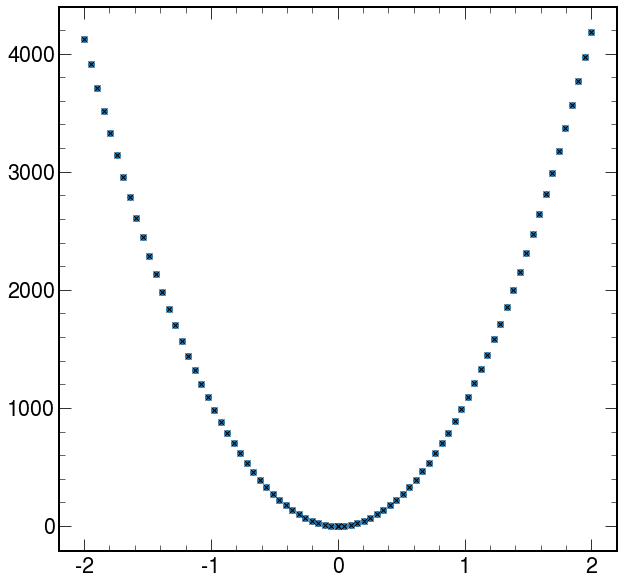

In [13]:
plt.plot(xvals, yvals, marker='o', linestyle="None")
plt.plot(xvals_scale, yvals_scale, marker='x', linestyle="None", color='black')

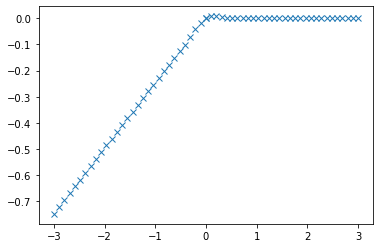

In [52]:
plt.plot(xvals, mvals, marker='x', linestyle="None")

Integral for hist Central is 368644796.1901399
Integral for hist up variation is 375054470.34123397
Integral for hist down variation is 364481777.01131713
Integral for hist mass+100 MeV is 368631391.1496568
Integral for hist mass -100 MeV is 368655786.18590415


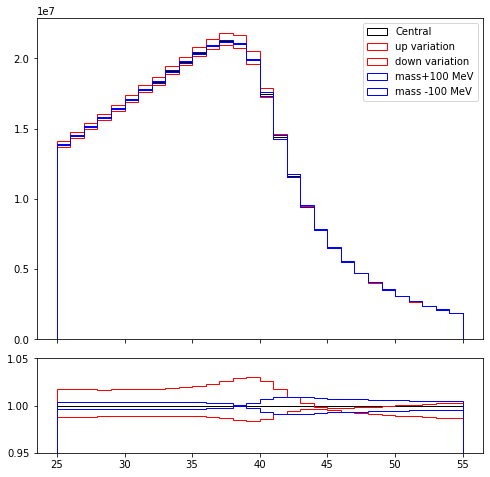

In [93]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_prefsr_scetlibOnly/WGenCombineInput.root")
branch = "ptl_prefsr"
process = "wmunu_minnlo_N3LLCorr"
#var = "resumscale_"+process
#var = "resumscale"
var = "QCDscale_muRmuF_"+process
#var = "massShift100MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
histpre,bins = f[process][histcen].numpy()
histpreUp,binsUp = f[process][histvar].numpy()
histpreDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
masspreUp,binsUp = f[process][branch+"_massShift100MeVUp_m"].numpy()
masspreDown,binsDown = f[process][branch+"_massShift100MeVDown_m"].numpy()
fig = plotHists([bins,binsUp,binsDown,binsUp,binsDown], [histpre,histpreUp,histpreDown,masspreUp,masspreDown], ["Central","up variation", "down variation", "mass+100 MeV", "mass -100 MeV"], ['black', 'red', 'red', "blue", "blue"])



In [66]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_scetlib/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
#var = "resumscale_"+process
#var = "resumscale"
#var = "QCDscale_muRmuF_"+process
var = "mWBWShift100MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
histpre,bins = f[process][histcen].numpy()
histpreUp,binsUp = f[process][histvar].numpy()
histpreDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
masspreUp,binsUp = f[process][branch+"_massShift100MeVUp_"+chan].numpy()
masspreDown,binsDown = f[process][branch+"_massShift100MeVDown_"+chan].numpy()
fig = plotHists([bins,binsUp,binsDown,binsUp,binsDown], [histpre,histpreUp,histpreDown,masspreUp,masspreDown], ["Central","up variation", "down variation", "mass+100 MeV", "mass -100 MeV"], ['black', 'red', 'red', "blue", "blue"])


KeyError: not found: b'ptl__m'
 in file: /eos/user/k/kelong/CombineStudies/WGen/ptl_scetlib/WGenCombineInput.root

Integral for hist Nominal is 363848246.40046334
Integral for hist $m_{W}$ $+20$ MeV is 363847528.46124864
Integral for hist $m_{W}$ $-20$ MeV is 363849279.0782268


(25.0, 55.0)

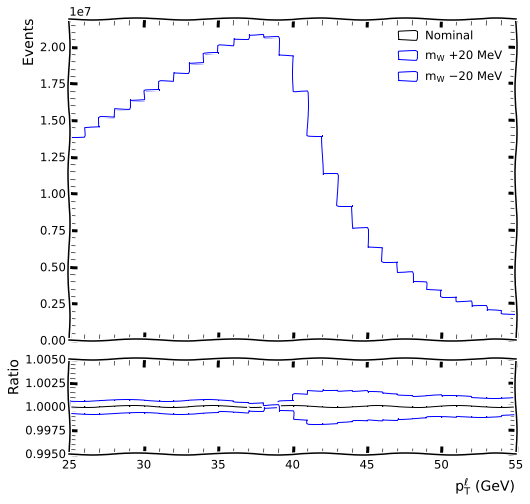

In [11]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_scetlibOnly/WGenCombineInput.root")
plt.xkcd()
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "resumscale_"+process
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
massUp,binsUp = f[process]["_".join([branch,massvar+"Up",chan])].numpy()
massDown,binsDown = f[process]["_".join([branch,massvar+"Down",chan])].numpy()
fig = plotHists([bins,binsUp,binsDown], [hist,massUp,massDown], ["Nominal","$m_{W}$ $+20$ MeV", "$m_{W}$ $-20$ MeV"], ['black', "blue", "blue"], ratio_range=[0.995, 1.005])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}^{\\ell}$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])

Integral for hist Nominal is 363848246.40046334
Integral for hist $\mu_{R}$ up is 366588902.57982427
Integral for hist $\mu_{R}$ down is 360265023.5051192
Integral for hist $\mu_{F}$ up is 365686220.07250184
Integral for hist $\mu_{F}$ down is 356282603.3041823
Integral for hist $\mu_{R}, \mu_{F}$ up is 370162254.83404535
Integral for hist $\mu_{R}, \mu_{F}$ down is 359745025.00322986


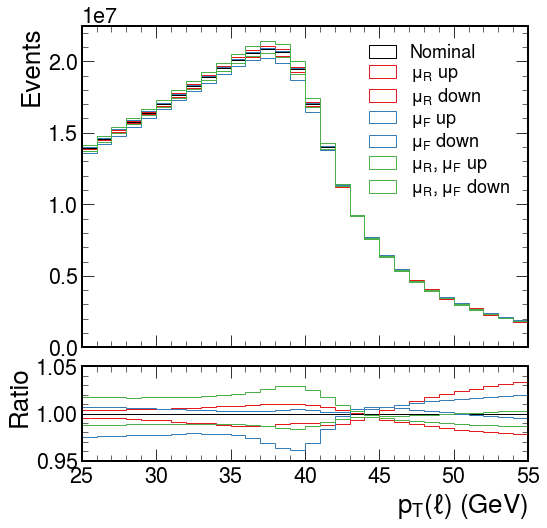

In [93]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "QCDscale_muR_"+process
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
hists = []
labels = []

histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
hists.append(hist)
labels.append("Nominal")
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([histUp, histDown])
labels.extend(["$\\mu_{R}$ up", "$\\mu_{R}$ down"])

histvar = histvar.replace("muR", "muF")
hist1Up,bins1Up = f[process][histvar].numpy()
hist1Down,bins1Down = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([hist1Up, hist1Down])
labels.extend(["$\\mu_{F}$ up", "$\\mu_{F}$ down"])

histvar = histvar.replace("muF", "muRmuF")
hist2Up,bins2Up = f[process][histvar].numpy()
hist2Down,bins2Down = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([hist2Up, hist2Down])
labels.extend(["$\\mu_{R}, \\mu_{F}$ up", "$\\mu_{R}, \\mu_{F}$ down"])

fig = plotHists([bins]*len(hists), hists, labels, ['black', "#e41a1c", "#e41a1c", "#377eb8", "#377eb8", "#4daf4a", "#4daf4a"], ratio_range=[0.95, 1.05])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}(\\ell)$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])
ax1.legend(loc=1, fontsize = 'x-small', labelspacing=0.1)


Integral for hist Nominal is 363848246.40046334
Integral for hist resum. scale up is 370045946.13463163
Integral for hist resum. scale down is 359272978.4889033
Integral for hist F.O. scale up is 367836387.022138
Integral for hist F.O. scale down is 365016656.69091475
Integral for hist F.O. matching up is 364405398.176934
Integral for hist F.O. matching down is 360978968.79868793
Integral for hist N.P. cutoff up is 364405398.176934
Integral for hist N.P. cutoff down is 360978968.79868793


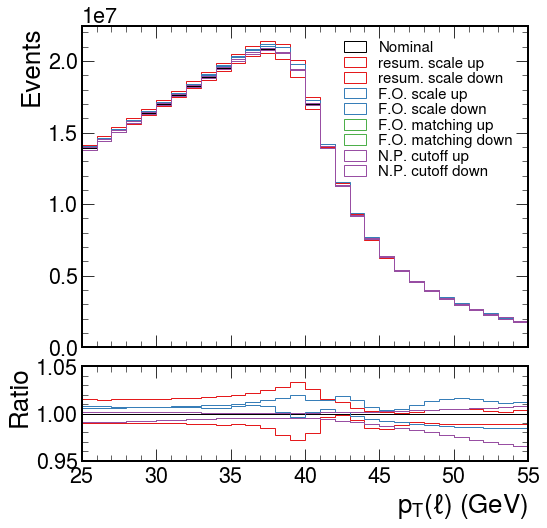

In [104]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "resumscaleDResum_"+process
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
hists = []
labels = []

histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
hists.append(hist)
labels.append("Nominal")
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([histUp, histDown])
labels.extend(["resum. scale up", "resum. scale down"])

histvar = histvar.replace("DResum", "DFO")
hist1Up,bins1Up = f[process][histvar].numpy()
hist1Down,bins1Down = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([hist1Up, hist1Down])
labels.extend(["F.O. scale up", "F.O. scale down"])

histvar = histvar.replace("DFO", "DMatch")
hist2Up,bins2Up = f[process][histvar].numpy()
hist2Down,bins2Down = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([hist2Up, hist2Down])
labels.extend(["F.O. matching up", "F.O. matching down"])

histvar = histvar.replace("DFO", "DLambda")
hist2Up,bins2Up = f[process][histvar].numpy()
hist2Down,bins2Down = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([hist2Up, hist2Down])
labels.extend(["N.P. cutoff up", "N.P. cutoff down"])

fig = plotHists([bins]*len(hists), hists, labels, ['black', "#e41a1c", "#e41a1c", "#377eb8", "#377eb8", "#4daf4a", "#4daf4a", "#984ea3", "#984ea3"], ratio_range=[0.95, 1.05])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}(\\ell)$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])
ax1.legend(loc=1, fontsize = 'xx-small', labelspacing=0.1)


Integral for hist Nominal is 363848246.40046334
Integral for hist envelope up is 371898452.50824165
Integral for hist envelope down is 351024955.20004636


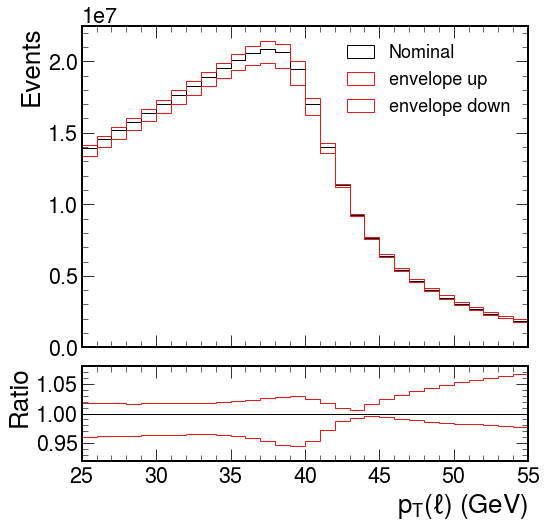

In [98]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "QCDscale_"+process
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
hists = []
labels = []

histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
hists.append(hist)
labels.append("Nominal")
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([histUp, histDown])
labels.extend(["envelope up", "envelope down"])

fig = plotHists([bins]*len(hists), hists, labels, ['black', "#e41a1c", "#e41a1c", "#377eb8", "#377eb8", "#4daf4a", "#4daf4a"], ratio_range=[0.92, 1.08])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}(\\ell)$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])
ax1.legend(loc=1, fontsize = 'x-small', labelspacing=0.5)


In [18]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root")
branch = "ptl"
process = "wmunu_minnlo_N3LLCorr"
var = "CMS_res_m"
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
hists = []
labels = []

histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
hists.append(hist)
labels.append("Nominal")
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([histUp, histDown])
labels.extend(["$\\mu$ scale up", "$\\mu$ scale down"])

fig = plotHists([bins]*len(hists), hists, labels, ['black', "#e41a1c", "#e41a1c", "#377eb8", "#377eb8", "#4daf4a", "#4daf4a"], ratio_range=[0.99, 1.01])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}(\\ell)$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])
ax1.legend(loc=1, fontsize = 'small', labelspacing=0.25)


KeyError: not found: b'ptl_CMS_res_mUp_m'
 in file: /eos/user/k/kelong/CombineStudies/WGen/ptl/WGenCombineInput.root

Integral for hist Nominal is 433781965.12600124
Integral for hist $m_{W}$ $+20$ MeV is 433783590.1902412
Integral for hist $m_{W}$ $-20$ MeV is 433780792.2367108


(0.0, 720.0)

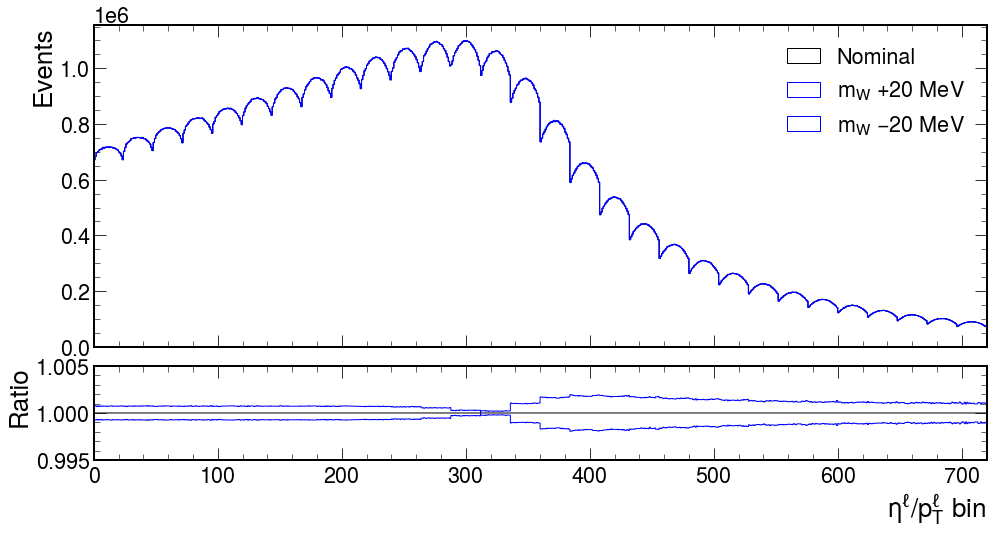

In [7]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/etal_ptl_smear_unrolled_scetlib_eff025/WGenCombineInput.root")
branch = "etal_ptl_smear_unrolled"
process = "wmunu_minnlo_N3LLCorr"
var = "CMS_scale_m"
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
massUp,binsUp = f[process]["_".join([branch,massvar+"Up",chan])].numpy()
massDown,binsDown = f[process]["_".join([branch,massvar+"Down",chan])].numpy()
fig = plotHists([bins,binsUp,binsDown], [hist,massUp,massDown], ["Nominal","$m_{W}$ $+20$ MeV", "$m_{W}$ $-20$ MeV"], ['black', "blue", "blue"], ratio_range=[0.995, 1.005], width=2)
ax1,ax2 = fig.axes
ax2.set_xlabel("$\\eta^{\\ell}$/$p_{T}^{\\ell}$ bin")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([0,720])
ax2.set_xlim([0,720])

Integral for hist Nominal is 460955889.930315
Integral for hist $\mu$ scale up is 460834845.3533575
Integral for hist $\mu$ scale down is 461075942.67053735


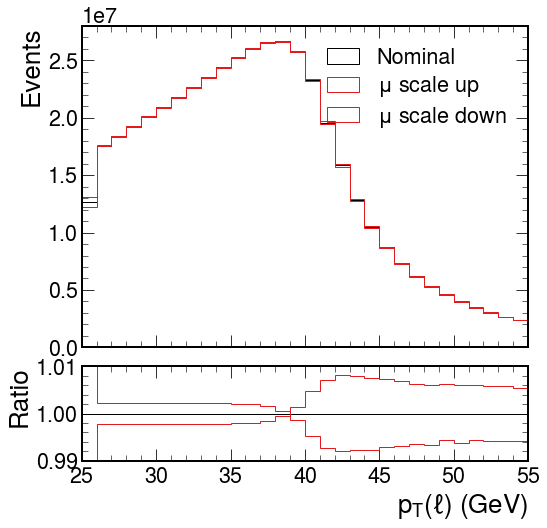

In [19]:
f = uproot.open("/eos/user/k/kelong/CombineStudies/WGen/ptl_smear_scetlib_eff025/WGenCombineInput.root")
branch = "ptl_smear"
process = "wmunu_minnlo_N3LLCorr"
var = "CMS_res_m"
#var = "resumscale"
#var = "QCDscale_"+process
massvar = "massShift20MeV"
chan="m"
hists = []
labels = []

histcen = "_".join([branch, chan])
histvar = "_".join([branch,var+"Up",chan])
hist,bins = f[process][histcen].numpy()
hists.append(hist)
labels.append("Nominal")
histUp,binsUp = f[process][histvar].numpy()
histDown,binsDown = f[process][histvar.replace("Up", "Down")].numpy()
hists.extend([histUp, histDown])
labels.extend(["$\\mu$ scale up", "$\\mu$ scale down"])

fig = plotHists([bins]*len(hists), hists, labels, ['black', "#e41a1c", "#e41a1c", "#377eb8", "#377eb8", "#4daf4a", "#4daf4a"], ratio_range=[0.99, 1.01])
ax1,ax2 = fig.axes
ax2.set_xlabel("$p_{T}(\\ell)$ (GeV)")
ax2.set_ylabel("Ratio")
ax1.set_ylabel("Events")
ax1.set_xlim([25,55])
ax2.set_xlim([25,55])
ax1.legend(loc=1, fontsize = 'small', labelspacing=0.25)


Integral for hist NNPDF31 is 5256851.896820068
Integral for hist NNPDF30 is 5100691.054796664
Integral for hist MMHT is 5221340.094652265
Integral for hist CT18 is 5193468.48435677
Integral for hist CT18Z is 5376685.925085954


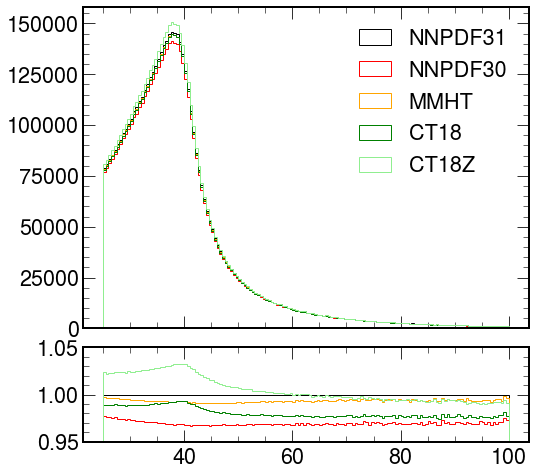

In [39]:
fct18 = uproot.open("/eos/user/k/kelong/SWAN_projects/PlotSystematics/ct18.root")
fct18z = uproot.open("/eos/user/k/kelong/SWAN_projects/PlotSystematics/ct18z.root")
fnnpdf31 = uproot.open("/eos/user/k/kelong/SWAN_projects/PlotSystematics/nnpdf31.root")
fmmht = uproot.open("/eos/user/k/kelong/SWAN_projects/PlotSystematics/mmht.root")
fnnpdf30 = uproot.open("/eos/user/k/kelong/SWAN_projects/PlotSystematics/nnpdf30.root")

branch = "ptl_prefsr"
process = "wmmunu_minnlo"
chan="mn"
histcen = "_".join([branch, chan])
nnpdf31,bins = fnnpdf31[process][histcen].to_numpy()
ct18,_ = fct18[process][histcen].to_numpy()
mmht,_ = fmmht[process][histcen].to_numpy()
nnpdf30,_ = fnnpdf30[process][histcen].to_numpy()
ct18z,_ = fct18z[process][histcen].to_numpy()

fig = plotHists(bins[50:201], [nnpdf31[50:200],nnpdf30[50:200],mmht[50:200],ct18[50:200],ct18z[50:200]], ["NNPDF31", "NNPDF30", "MMHT", "CT18", "CT18Z"], ['black', 'red', 'orange', "green", "lightgreen"], ratio_range=[0.95, 1.05])



array([25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. ,
       30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5,
       36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. ,
       41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. , 46.5,
       47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5, 51. , 51.5, 52. ,
       52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. , 57.5,
       58. , 58.5, 59. , 59.5, 60. , 60.5, 61. , 61.5, 62. , 62.5, 63. ,
       63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5,
       69. , 69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. ,
       74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5, 78. , 78.5, 79. , 79.5,
       80. , 80.5, 81. , 81.5, 82. , 82.5, 83. , 83.5, 84. , 84.5, 85. ,
       85.5, 86. , 86.5, 87. , 87.5, 88. , 88.5, 89. , 89.5, 90. , 90.5,
       91. , 91.5, 92. , 92.5, 93. , 93.5, 94. , 94.5, 95. , 95.5, 96. ,
       96.5, 97. , 97.5, 98. , 98.5, 99. , 99.5])